In [27]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
sns.set(style='dark', palette='muted', color_codes=True)
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import plotly.express as px 

In [28]:
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder,MinMaxScaler,StandardScaler 
from sklearn.compose import ColumnTransformer 
from sklearn.decomposition import PCA 
from sklearn.linear_model import LinearRegression,LogisticRegression 
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,silhouette_score,confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor 
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor 
from sklearn.cluster import KMeans

In [29]:
data = pd.read_csv(r'c:\Github\Sol\the_data\data-lab-5-hcv.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [30]:
mis_data = data.isna().sum() * 100/len(data)

mis_data.sort_values(ascending=False)

ALP           2.926829
CHOL          1.626016
ALB           0.162602
ALT           0.162602
PROT          0.162602
Unnamed: 0    0.000000
Category      0.000000
Age           0.000000
Sex           0.000000
AST           0.000000
BIL           0.000000
CHE           0.000000
CREA          0.000000
GGT           0.000000
dtype: float64

In [31]:
data.duplicated().sum()

data.drop_duplicates(ignore_index=False, keep='first', subset=None, inplace=True)

data.duplicated().sum()

0

In [32]:
data.drop(columns=['Unnamed: 0'], inplace=True)

<AxesSubplot:title={'center':'Corelation Matrix'}>

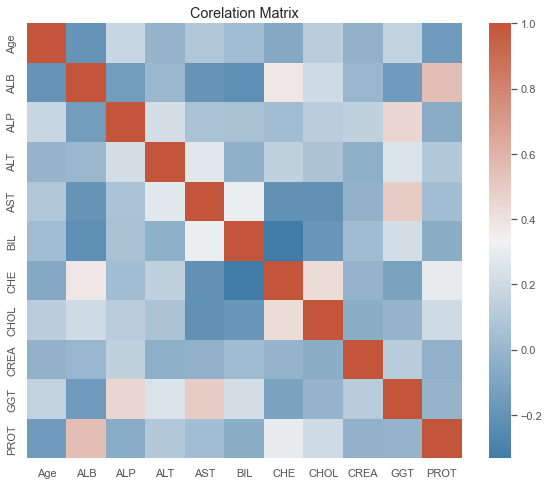

In [33]:
f,ax = plt.subplots(figsize=(10,8))

ax.set_title('Corelation Matrix')

data_corr = data.corr()

sns.heatmap(data_corr, mask=np.zeros_like(data_corr, dtype=np.bool_), cmap=sns.diverging_palette(240,20, as_cmap=True), ax=ax, square=True)

In [34]:
y = data.Category 

le = LabelEncoder()

y_true = le.fit_transform(y)

data = pd.get_dummies(data, dtype=float)
data

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category_0=Blood Donor,Category_0s=suspect Blood Donor,Category_1=Hepatitis,Category_2=Fibrosis,Category_3=Cirrhosis,Sex_f,Sex_m
0,32,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,32,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,32,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,32,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,32,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,0.0,0.0,0.0,0.0,1.0,1.0,0.0
611,64,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,0.0,0.0,0.0,0.0,1.0,1.0,0.0
612,64,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
613,46,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
